# Environmental setup

In [1]:
import xarray as xr
import matplotlib.pylab as plt
import matplotlib
import matplotlib as mpl
import matplotlib.dates as md
from matplotlib import ticker
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['axes.linewidth'] = 1.5

import cmocean
import seaborn as sns

import numpy as np
from scipy import stats
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import scipy.spatial.qhull as qhull
import matplotlib.tri as mtri
import pandas as pd
#%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm


import numpy as np
import xarray as xr
import pandas as pd

from scipy import stats
from scipy import optimize
from scipy.stats import binned_statistic
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import scipy.spatial.qhull as qhull

import matplotlib.pylab as plt
import matplotlib
import matplotlib.tri as mtri
import matplotlib as mpl
import matplotlib.dates as md
import matplotlib.patches as patches
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib import ticker
import cmocean

matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['axes.linewidth'] = 1.5

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point


import subprocess
import datetime
from datetime import timedelta
import time

import intake

In [14]:
matplotlib.rcParams['figure.dpi'] = 200

In [3]:
cat_yaml = "/work/bm1235/k203123/NextGEMS_Cycle3.git/experiments/ngc3028/outdata/ngc3028.yaml"
ds = intake.open_catalog(cat_yaml).ngc3028(time="P1D", zoom=7, chunks="auto").to_dask()  # I use chunks="auto" here, to enable lazyness with dask

def balance(ds):
    return ds.rsdt - ds.rsut - ds.rlut
    
def tas(ds):
    return ds.tas
    
ngc28_toanet_mean = balance(ds.resample(time='1M').mean('time').mean('cell')).values
ngc28_tas_mean   = tas(ds.resample(time='1M').mean('time').mean('cell')).values

# Data read

### CERES-EBAF 4.1

In [4]:
dpath     = '/pool/data/ICDC/atmosphere/ceres_ebaf/DATA/'
# dataCERES = xr.open_mfdataset(dpath+'/CERES_EBAF-TOA_Ed4.2_Subset_200003-202301.nc')
dataCERES = xr.open_mfdataset(dpath+'/CERES_EBAF-TOA_Edition4.2_MONTHLY_200003-202301.nc')
dataCERES

<xarray.Dataset>
Dimensions:                      (time: 275, lon: 360, lat: 180)
Coordinates:
  * time                         (time) datetime64[ns] 2000-03-15 ... 2023-01-15
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_lw_all_mon               (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_net_all_mon              (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_sw_clr_c_mon             (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_lw_clr_c_mon             (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_net_clr_c_mon            (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    solar_mon                    (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldarea_total_daynight_mon   (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldpress_total_daynight_mon  (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldtemp_total_daynight_mon   (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldtau_total_day_mon         (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.2; Release Date December 9, 2022
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF-TOA_L3B004.2
    Fill_Value:   Fill Value is -999.0
    history:      Tue May 02 12:30:56 2023: cdo -selname,cldarea_total_daynig...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

### HadCRUT 5.0

In [5]:
dpath   = '/work/mh0731/m300793/data/CRUTEM/'
dataCRU = xr.open_mfdataset(dpath+'/CRUTEM.5.0.1.0.anomalies.nc')
dataHad = xr.open_mfdataset(dpath+'/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc')
dataABS = xr.open_mfdataset(dpath+'/absolute_v5.nc')
dataHad

<xarray.Dataset>
Dimensions:           (time: 2064, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 1850-01-16T12:00:00 ... 2021-12-1...
  * latitude          (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude         (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
    realization       int64 ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time, latitude, longitude) float64 dask.array<chunksize=(2064, 36, 72), meta=np.ndarray>
    time_bnds         (time, bnds) datetime64[ns] dask.array<chunksize=(2064, 2), meta=np.ndarray>
    latitude_bnds     (latitude, bnds) float64 dask.array<chunksize=(36, 2), meta=np.ndarray>
    longitude_bnds    (longitude, bnds) float64 dask.array<chunksize=(72, 2), meta=np.ndarray>
    realization_bnds  (bnds) int64 dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2022-01-14T11:05:40+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

# Processing

### Retrieve 2m temperature

In [6]:
dataCRU = dataCRU.sel(time=slice('2001','2020'))
dataHad = dataHad.sel(time=slice('2001','2020'))

In [7]:
tdim, ydim, xdim = 240, 36, 72

tas_had_temp = np.zeros((tdim, ydim, xdim))
mm = 0
for tt in np.arange(0,tdim):
    mm = np.mod(tt,12)
    tas_had_temp[tt,:,:] = dataHad['tas_mean'].isel(time=tt).values \
                         + dataABS['tem'].isel(time=mm).values \
                         + 273.15


had_tas = xr.Dataset(
                        {
                        "tas" : (("time", "lat", "lon"), tas_had_temp,),
                        },
                        coords={
                                "time": dataHad['time'].values,
                                "lat":  dataHad['latitude'].values,
                                "lon":  dataHad['longitude'].values,
                                },
                    )
had_tas

<xarray.Dataset>
Dimensions:  (time: 240, lat: 36, lon: 72)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-16T12:00:00 ... 2020-12-16T12:00:00
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
Data variables:
    tas      (time, lat, lon) float64 245.0 244.2 246.4 ... 247.4 247.5 247.3

### Compute weighting

In [8]:
ceres_weights = xr.DataArray(np.cos(np.deg2rad(dataCERES['lat'])))
ceres_weights.name = "weights"
ceres_weights

<xarray.DataArray 'weights' (lat: 180)>
array([0.00872656, 0.02617699, 0.04361945, 0.06104851, 0.07845908,
       0.09584576, 0.11320324, 0.13052624, 0.14780948, 0.16504757,
       0.18223551, 0.19936794, 0.21643965, 0.23344542, 0.25037998,
       0.26723838, 0.28401536, 0.30070582, 0.3173047 , 0.33380693,
       0.35020736, 0.3665012 , 0.38268346, 0.3987491 , 0.4146933 ,
       0.43051115, 0.44619778, 0.4617486 , 0.47715878, 0.49242356,
       0.5075384 , 0.5224986 , 0.5372996 , 0.551937  , 0.56640625,
       0.58070296, 0.59482276, 0.6087614 , 0.62251467, 0.6360782 ,
       0.64944804, 0.66262007, 0.67559016, 0.68835455, 0.70090926,
       0.71325046, 0.72537434, 0.7372773 , 0.7489557 , 0.76040596,
       0.77162457, 0.78260815, 0.7933533 , 0.8038569 , 0.8141155 ,
       0.8241262 , 0.83388585, 0.8433914 , 0.85264015, 0.8616291 ,
       0.87035567, 0.87881714, 0.8870108 , 0.89493436, 0.90258527,
       0.9099613 , 0.9170601 , 0.9238795 , 0.9304176 , 0.9366722 ,
       0.9426415 , 0.94832367, 0.95371693, 0.95881975, 0.96363044,
       0.96814764, 0.9723699 , 0.976296  , 0.9799247 , 0.9832549 ,
       0.9862856 , 0.9890159 , 0.9914449 , 0.9935719 , 0.9953962 ,
       0.9969173 , 0.9981348 , 0.99904823, 0.99965733, 0.9999619 ,
       0.9999619 , 0.99965733, 0.99904823, 0.9981348 , 0.9969173 ,
       0.9953962 , 0.9935719 , 0.9914449 , 0.9890159 , 0.9862856 ,
       0.9832549 , 0.9799247 , 0.976296  , 0.9723699 , 0.96814764,
       0.96363044, 0.95881975, 0.95371693, 0.94832367, 0.9426415 ,
       0.9366722 , 0.9304176 , 0.9238795 , 0.9170601 , 0.9099613 ,
       0.90258527, 0.89493436, 0.8870108 , 0.87881714, 0.87035567,
       0.8616291 , 0.85264015, 0.8433914 , 0.83388585, 0.8241262 ,
       0.8141155 , 0.8038569 , 0.7933533 , 0.78260815, 0.77162457,
       0.76040596, 0.7489557 , 0.7372773 , 0.72537434, 0.71325046,
       0.70090926, 0.68835455, 0.67559016, 0.66262007, 0.64944804,
       0.6360782 , 0.62251467, 0.6087614 , 0.59482276, 0.58070296,
       0.56640625, 0.551937  , 0.5372996 , 0.5224986 , 0.5075384 ,
       0.49242356, 0.47715878, 0.4617486 , 0.44619778, 0.43051115,
       0.4146933 , 0.3987491 , 0.38268346, 0.3665012 , 0.35020736,
       0.33380693, 0.3173047 , 0.30070582, 0.28401536, 0.26723838,
       0.25037998, 0.23344542, 0.21643965, 0.19936794, 0.18223551,
       0.16504757, 0.14780948, 0.13052624, 0.11320324, 0.09584576,
       0.07845908, 0.06104851, 0.04361945, 0.02617699, 0.00872656],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [9]:
had_weights = xr.DataArray(np.cos(np.deg2rad(had_tas['lat'])))
had_weights.name = "weights"
had_weights

<xarray.DataArray 'weights' (lat: 36)>
array([0.04361939, 0.13052619, 0.21643961, 0.3007058 , 0.38268343,
       0.46174861, 0.53729961, 0.60876143, 0.67559021, 0.73727734,
       0.79335334, 0.84339145, 0.88701083, 0.92387953, 0.95371695,
       0.97629601, 0.99144486, 0.99904822, 0.99904822, 0.99144486,
       0.97629601, 0.95371695, 0.92387953, 0.88701083, 0.84339145,
       0.79335334, 0.73727734, 0.67559021, 0.60876143, 0.53729961,
       0.46174861, 0.38268343, 0.3007058 , 0.21643961, 0.13052619,
       0.04361939])
Coordinates:
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5

### Compute global mean

##### OBS

In [10]:
ceres_toanet_mean = dataCERES['toa_net_all_mon'].sel(time=slice('2001','2020')) \
                    .weighted(ceres_weights).mean(('lat','lon')).values

had_tas_mean      = had_tas['tas'].weighted(had_weights).mean(('lat','lon')).values

# Plot

### Reproduce figure7

In [11]:
# ngc26_MM = np.arange(len(ngc26_tas_mean)) + 1
ngc28_MM = np.mod(np.arange(len(ngc28_tas_mean)), 12) + 1

In [22]:
len(ngc28_tas_mean)

67

In [25]:
int(24/12)

2

In [29]:
def add_ngc_plot(ax, input_tas, input_toanet, color, label, MM, alpha=1.0):
    """ Add plot for given ngc simulation data set
    input_tas(xarray): 2m temperature data
    input_toanet(xarray): TOA net radiation data
    color(string): color for line
    label(string): label
    MM(integer list): list of month
    """    
    
    input_tas = input_tas - 273.15
    ax.plot(input_tas, input_toanet, c=color, label=label, alpha=alpha)

    for a,b,c in zip(input_tas, input_toanet, MM):
        ax.scatter(a, b, c=color, s=70, alpha=alpha)
        ax.text(a, b, c, ha='center', va='center', size=8, c='white')

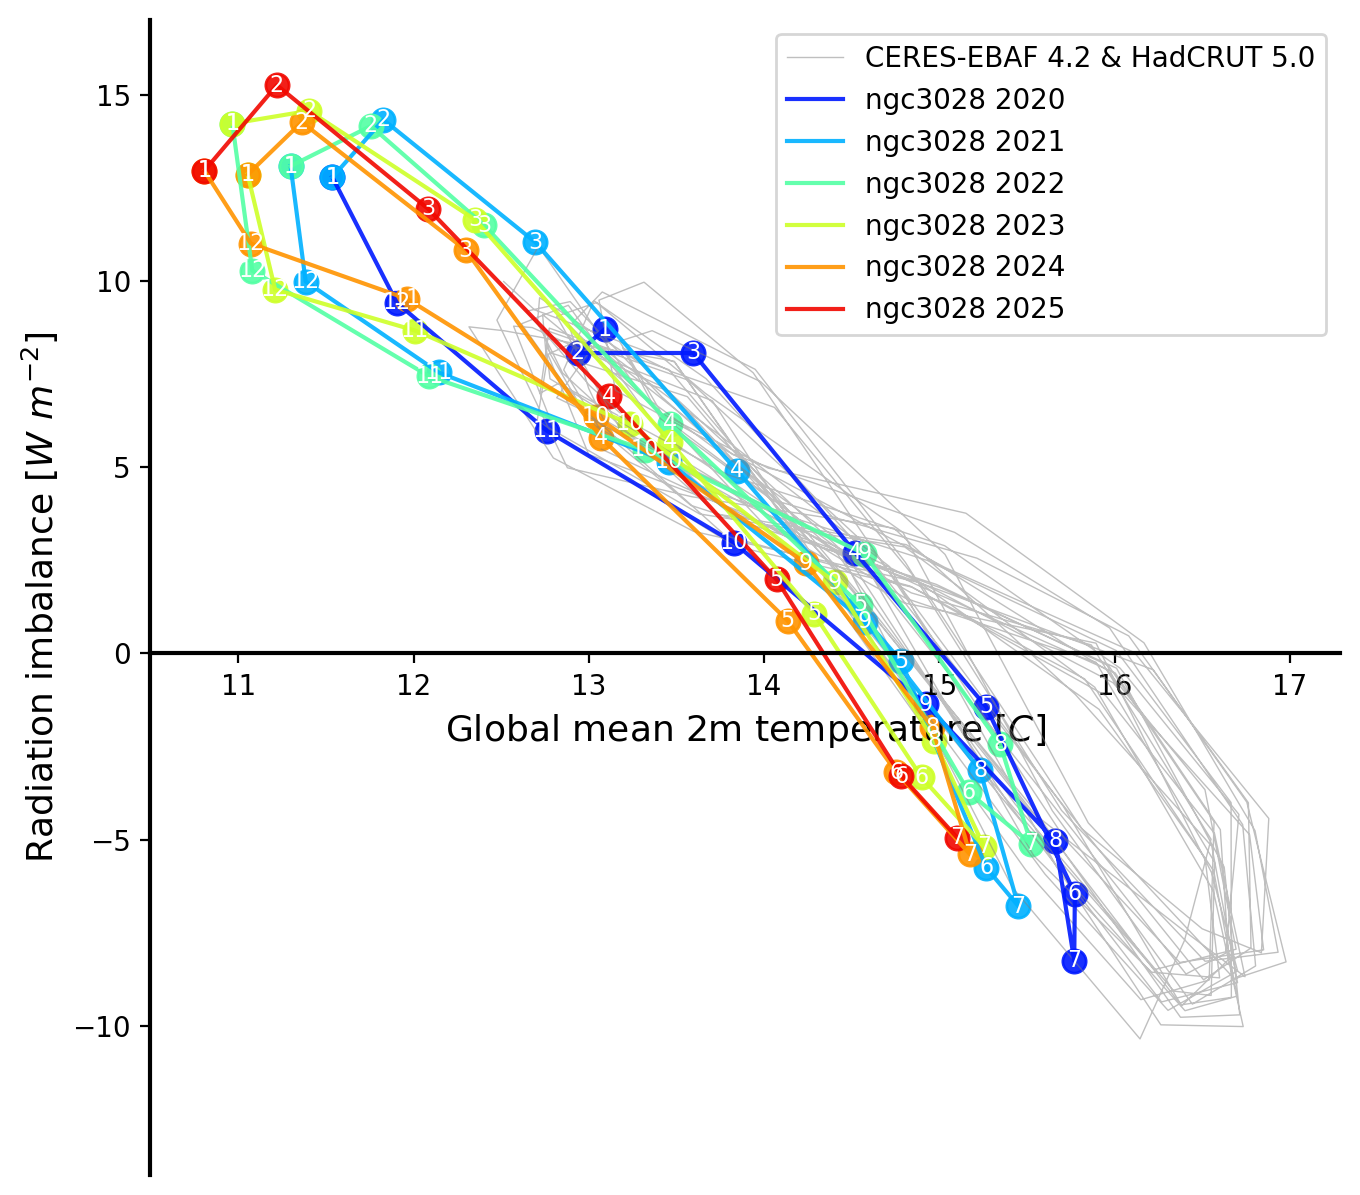

In [41]:
rmax, cmax = 2, 2
fig, ax = plt.subplots(nrows=rmax,ncols=cmax, figsize=(13,12),)

rr, cc = 0, 0
ax[rr,cc].plot(had_tas_mean-273.15, ceres_toanet_mean, c='gray', 
               linewidth=0.5, alpha=0.5, label='CERES-EBAF 4.2 & HadCRUT 5.0')

ngc28_len = len(ngc28_tas_mean)
for YY in np.arange(int(ngc28_len/12)+1, dtype=int):

    idx_s, idx_e = YY*12, (YY+1)*12 + 1
    idx_color    = 0.75*YY/int(ngc28_len/12) + 0.15
    add_ngc_plot(ax[rr,cc], ngc28_tas_mean[idx_s:idx_e], ngc28_toanet_mean[idx_s:idx_e],
                 plt.cm.jet([idx_color]), f'ngc3028 202{YY}', ngc28_MM[idx_s:idx_e], alpha=0.9)
    
# ax[rr,cc].set_xlim(10.8, 17.3)
ax[rr,cc].set_xlabel('Global mean 2m temperature [$C$]', fontsize=13)
ax[rr,cc].set_ylim(-14.0, 17.0)
ax[rr,cc].set_ylabel('Radiation imbalance [$W \ m^{-2}$]', fontsize=13)
# set the x-spine
ax[rr,cc].spines['bottom'].set_position('zero')
ax[rr,cc].spines[['right', 'top']].set_visible(False)

ax[rr,cc].legend()
leg=ax[rr,cc].legend()
# leg.get_frame().set_linewidth(0.0)

rr, cc = 0, 1
ax[rr,cc].set_visible(False)
rr, cc = 1, 0
ax[rr,cc].set_visible(False)
rr, cc = 1, 1
ax[rr,cc].set_visible(False)

plt.tight_layout()